# Heart-Disease-Dataset
## UCI Cleveland Heart disease dataset


The Heart-Disease-Dataset database consists of 76 attributes, but only a subset of 14 attributes has been utilized in all published experiments thus far. Among these experiments, ML researchers have exclusively employed the Cleveland database. The attribute labeled "goal" indicates the presence of heart disease in a patient and is represented by an integer ranging from 0 (indicating no presence) to 4. Previous studies conducted using the Cleveland database have primarily focused on distinguishing between the presence (values 1, 2, 3, 4) and absence (value 0) of heart disease.


https://www.kaggle.com/datasets/ineubytes/heart-disease-dataset


Variables explanation: 

- age => age in years
- sex => (1 = male; 0 = female)
- cp => chest pain type (4 values)
- trestbps => resting blood pressure (in mm Hg on admission to the hospital)
- chol => serum cholestoral in mg/dl
- fbs => (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
- restecg => resting electrocardiographic results
- thalach => maximum heart rate achieved
- exang => exercise induced angina (1 = yes; 0 = no)
- oldpeak => ST depression induced by exercise relative to rest
- slope => the slope of the peak exercise ST segment
- ca => number of major vessels (0-3) colored by flourosopy
- thal => 0 = normal; 1 = fixed defect; 2 = reversable defect
- target => 0 absence heart disease

# IMPORT and PREPARE DATA

In [17]:
#Import the libraries necessaries for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
#Load the dataset
path = './data/heart.csv'
raw_df = pd.read_csv(path,sep=',')

In [7]:
#Display the information loaded
display(raw_df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
#Check for the total number of registers
raw_df.shape

(1025, 14)

In [13]:
#Check the null values
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [25]:
raw_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Conclusion:
1025/1025 values, not null and no need to work in this part to solve the NaN/null situation

14/14 Dtype number, no need to transform any field to number, is already coded (i.e. sex)


In [12]:
#Define the target to search and the features to work with
target = raw_df['target']

#Define the features to work with (everything less 'target')
data = raw_df.drop('target', axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [30]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [31]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
dtype: int64

### Conclusion:
About the values for age the numbers looks not ok, due to this we will to analize in detail:

In [49]:
# CHECK the AGE
maxAge = data['age'].max()
minAge = data['age'].min()
quantityOfAges = maxAge - minAge
quantityOfAges_inData = data['age'].nunique()
ageBias = quantityOfAges-quantityOfAges_inData
print(f'The total number of ages need be {quantityOfAges}, we have in our data {quantityOfAges_inData}')
if(ageBias>0):
    print(f'We have a possible bias => lack of {ageBias} ages in number of ages')

The total number of ages need be 48, we have in our data 41
We have a possible bias => lack of 7 ages in number of ages


About the information of the parameters are correct ( number of possible values / unique values) for almost every column, except for the columns:
    ca => number of major vessels (0-3) colored by flourosopy =============> unique of 5   
    thal => 0 = normal; 1 = fixed defect; 2 = reversable defect =============> unique of 4


In [ ]:
# CHECK the CA


In [ ]:
# CHECK the THAL  


# Data Visualization

In [21]:
target.value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0, 0.5, 'count')

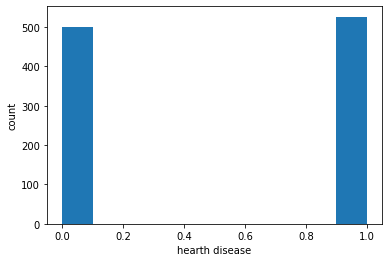

In [20]:
plt.hist(target)
plt.xlabel('hearth disease')
plt.ylabel('count')

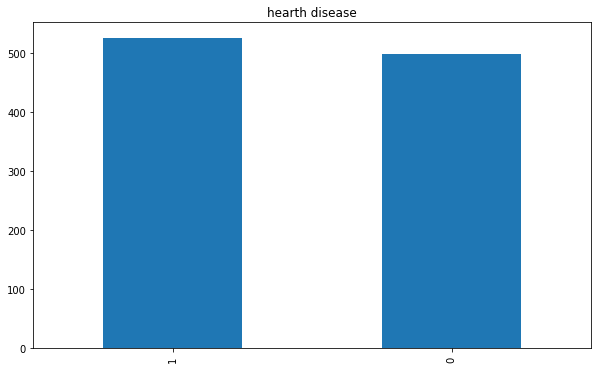

In [22]:
target.value_counts().plot.bar(figsize=(10,6), title='hearth disease')

### Conclusion:
With the numbers and bars we can see the results are more or less at the same %, same number to calculate with or without. 

In [ ]:
feature_names = ('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal') 